In [6]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
bikedf = pd.read_csv("C:\\Users\\newms\\Downloads\\day.csv")
bikedf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
bikedf.shape

(730, 16)

In [8]:
bikedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [15]:
bikedf.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [30]:
biketemp = bikedf[['season','mnth','holiday','weekday','weathersit','atemp','hum','windspeed','casual','registered','cnt']]
biketemp.head()

,season,mnth,holiday,weekday,weathersit,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,6,2,18.18125,80.5833,10.749882,331,654,985
1,1,1,0,0,2,17.68695,69.6087,16.652113,131,670,801
2,1,1,0,1,1,9.47025,43.7273,16.636703,120,1229,1349
3,1,1,0,2,1,10.60610,59.0435,10.739832,108,1454,1562
4,1,1,0,3,1,11.46350,43.6957,12.522300,82,1518,1600


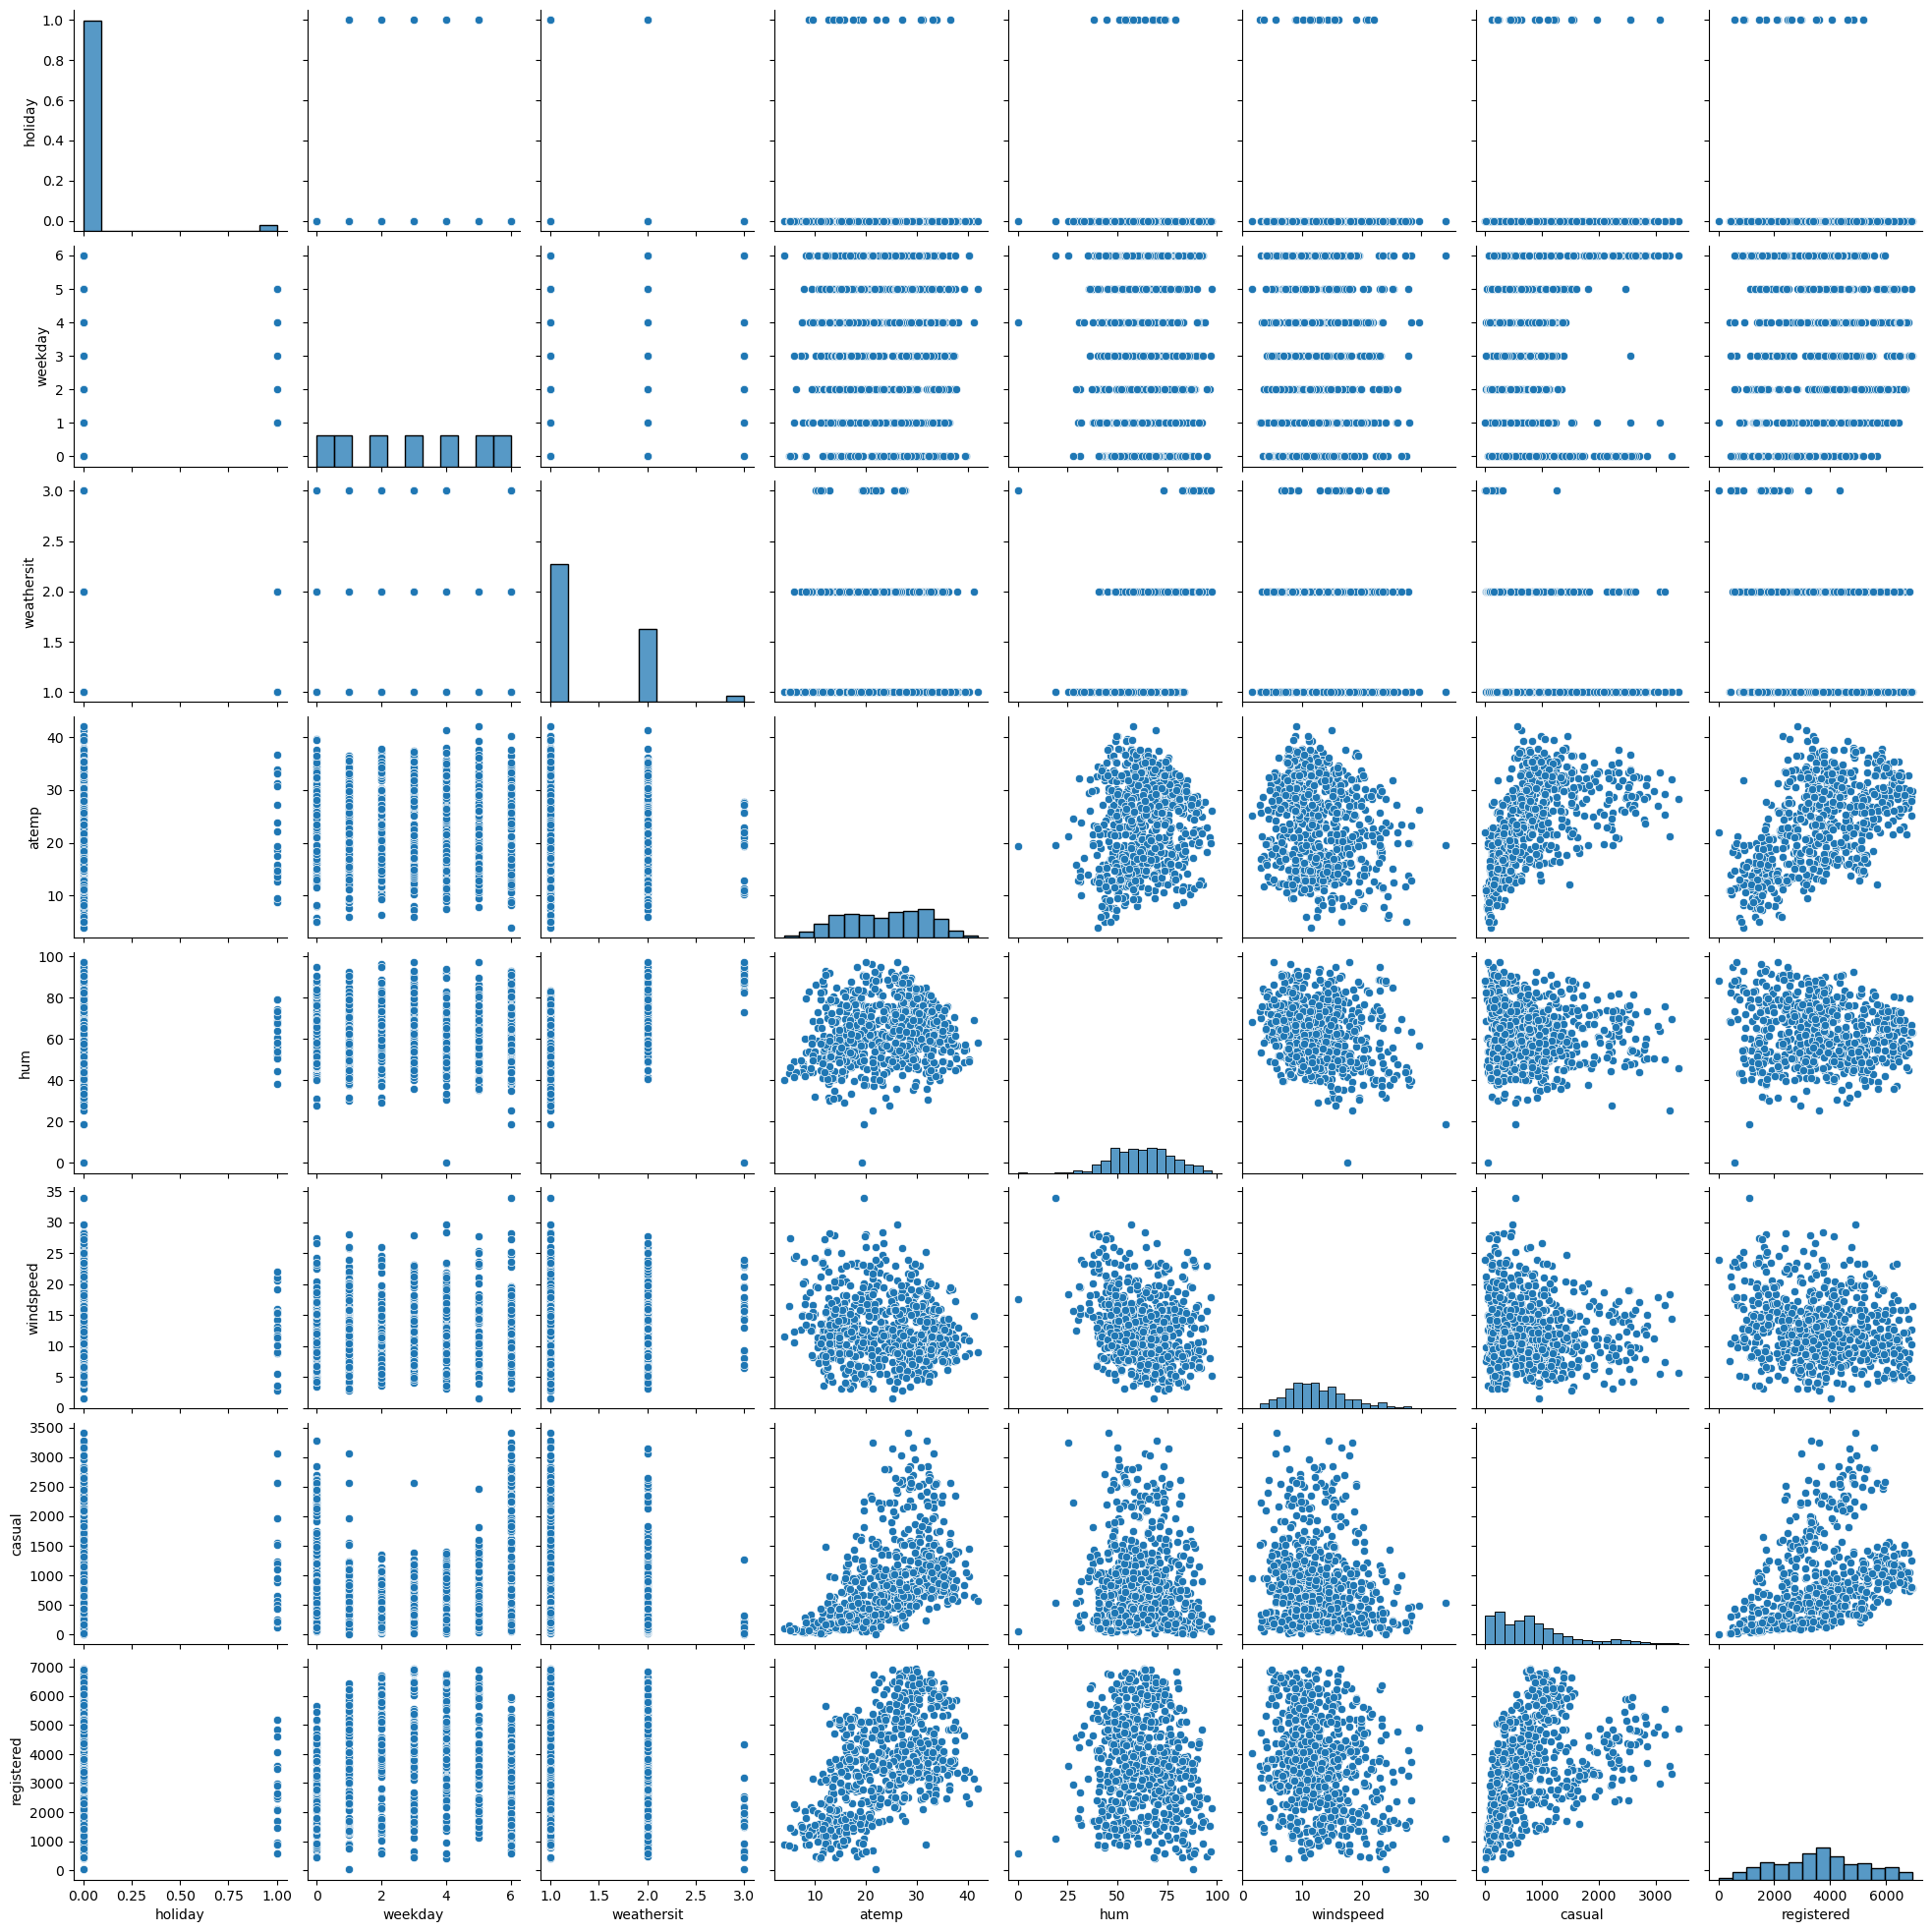

In [18]:

varlist =  ['holiday','weekday','weathersit', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
sns.pairplot(bikedf[varlist])
plt.show()

In [31]:
# I want to run the whole model only on few columns I have selected into biketemp dataframe
df_train, df_test = train_test_split(biketemp, train_size = 0.7, test_size = 0.3, random_state = 100)

In [28]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [32]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['weekday','weathersit', 'atemp', 'hum', 'windspeed', 'casual', 'registered','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()


,season,mnth,holiday,weekday,weathersit,atemp,hum,windspeed,casual,registered,cnt
653,4,10,0,0.333333,0.0,0.501133,0.575354,0.300794,0.280402,0.951776,0.864243
576,3,7,0,0.333333,0.0,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658
426,1,3,0,1.000000,0.5,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255
728,1,12,0,0.000000,0.0,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096
482,2,4,0,1.000000,0.5,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973


In [33]:
y_train = df_train.pop('cnt')
X_train = df_train

In [35]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [41]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)



LinearRegression()

In [43]:
rfe = RFE(lm)             # running RFE
rfe = rfe.fit(X_train, y_train)


In [44]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_)) 

[('season', False, 3),
 ('mnth', True, 1),
 ('holiday', False, 4),
 ('weekday', True, 1),
 ('weathersit', False, 2),
 ('atemp', True, 1),
 ('hum', False, 5),
 ('windspeed', False, 6),
 ('casual', True, 1),
 ('registered', True, 1)]

In [46]:
col = X_train.columns[rfe.support_]
col

Index(['mnth', 'weekday', 'atemp', 'casual', 'registered'], dtype='object')

In [47]:
X_train.columns[~rfe.support_]

Index(['season', 'holiday', 'weathersit', 'hum', 'windspeed'], dtype='object')

In [48]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]


In [49]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)


In [50]:

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [51]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.252e+29
Date:                Sun, 14 Jul 2024   Prob (F-statistic):               0.00
Time:                        22:15:30   Log-Likelihood:                 15947.
No. Observations:                 510   AIC:                        -3.188e+04
Df Residuals:                     504   BIC:                        -3.186e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.261e-16   9.73e-16     -0.335      0.7